# SALES PREDICTION

In [ ]:
import numpy as np

In [ ]:
class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=1000):
        self.num_samples = X_data.shape[0]
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # Initialize weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        return np.mean((y_pred - y_target) ** 2)

    def predict(self, X_data):
        return X_data.dot(self.theta)

    def fit(self):
        for epoch in range(self.num_epochs):
            # Loss
            y_pred = self.predict(self.X_data)
            loss = self.compute_loss(y_pred, self.y_target)

            # Gradient
            grad = (1 / self.num_samples) * self.X_data.T.dot(y_pred - self.y_target)

            # Update theta
            self.theta = self.theta - self.learning_rate * grad

            self.losses.append(loss)

            if epoch % 50 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")


        return {
            "loss": sum(self.losses) / len(self.losses),
            "weight": self.theta
        }

In [ ]:
# 1 a
# 2 c
# 3 d


In [ ]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [ ]:
# Tinh r2 score
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
r2_score(y, y_pred)

1.0

In [ ]:
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 5, 2, 4])
r2_score(y, y_pred)

-2.235294117647059

# POLYNOMIAL REGRESSION

In [ ]:
# 5 b
# 6 b
# 7 a
# 8 a

In [ ]:
def create_polynomial_features(X, degree):
    X_poly = np.copy(X)
    for i in range(2, degree + 1):
        X_poly = np.c_[X_poly, X ** i]
    return X_poly

# SALES PREDICTION

In [ ]:
!gdown 1QLxsbVKswjU48XeAXcr4Fei3eE6rNvfG

Downloading...
From: https://drive.google.com/uc?id=1QLxsbVKswjU48XeAXcr4Fei3eE6rNvfG
To: /content/SalesPrediction.csv
100% 206k/206k [00:00<00:00, 3.89MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv("SalesPrediction.csv")
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [ ]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [ ]:
df.Influencer.unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [ ]:
# Change Influencer column -> One hot label
df = pd.get_dummies(df)

In [ ]:
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


In [ ]:
 # Handles Null values
df = df.fillna(df.mean())

In [ ]:
# Get features
X = df[["TV",
        "Radio",
        "Social Media",
        "Influencer_Macro",
        "Influencer_Mega",
        "Influencer_Micro",
        "Influencer_Nano"]]

y = df[["Sales"]]

In [ ]:
# Split Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=0)

In [ ]:
# Normalize Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train_processed)
X_test_poly = poly_features.fit_transform(X_test_processed)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
preds = model.predict(X_test_processed)

In [ ]:
r2_score(y_test, preds)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Sales,0.995267


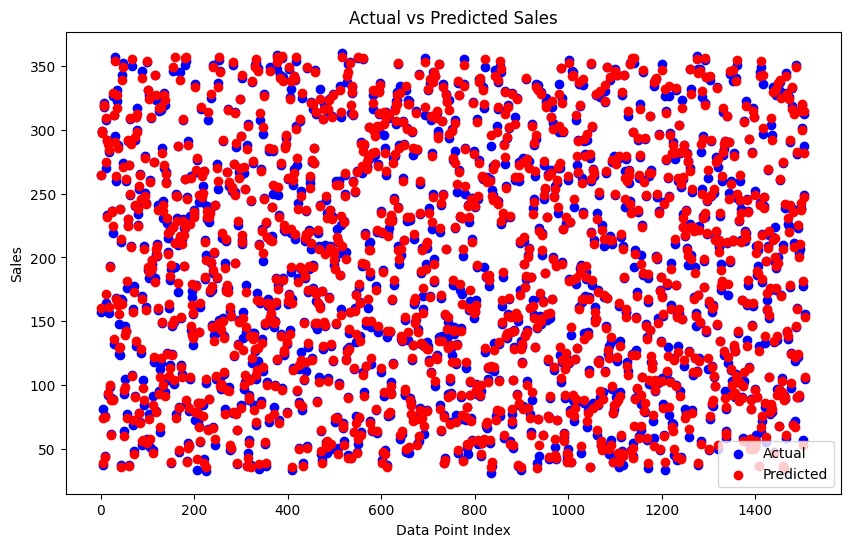

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')  # Blue for actual
plt.scatter(range(len(preds)), preds, color='red', label='Predicted')  # Red for predicted
plt.xlabel('Data Point Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()